In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Get to know the datasets
mouse_data_df.head() #Mouse ID, Drug
mouse_data_df.Drug.unique() #10 unique drugs
mouse_data_df['Mouse ID'].value_counts() #2 results for g989
g989_mouse_data = mouse_data_df.loc[mouse_data_df['Mouse ID'] == "g989",:] #g989-7: Stelasyn, g989-173: Propriva

clinical_trial_df.head() #Mouse ID, Timepoint, Tumor Volumne, Metastatic Sites
clinical_trial_df['Mouse ID'].value_counts() #13 instances of g989, but 10 unique drugs
g989_clinical_trial = clinical_trial_df.loc[clinical_trial_df["Mouse ID"] == "g989",:]
#g989 has two timelines reported in cinical_trial_df; cannot determine which corresponds to which drug, but these two drugs are not one of the four we are analyzing

# Combine the data into a single dataset 
pymaceuticals_df = pd.merge(clinical_trial_df, mouse_data_df, on='Mouse ID', how='outer')

pymaceuticals_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug"] == "Capomulin") | 
                                        (pymaceuticals_df["Drug"] == "Infubinol") | 
                                        (pymaceuticals_df["Drug"] == "Ketapril") |
                                        (pymaceuticals_df["Drug"] == "Placebo"), :]

# Display the data table for preview
pymaceuticals_df.sort_values('Timepoint').head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
244,k483,0,45.0,0,Infubinol
1278,i477,0,45.0,0,Placebo
1271,o302,0,45.0,0,Placebo
1838,g288,0,45.0,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
pymaceuticals_grouped_df = pymaceuticals_df.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
mean_tumor_volume_df = pymaceuticals_grouped_df.mean()

# Preview DataFrame
mean_tumor_volume_df.head()


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_error = pymaceuticals_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_volume_error_df = pd.DataFrame(tumor_volume_error)

# Preview DataFrame
tumor_volume_error_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_reformat = mean_tumor_volume_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tumor_volume_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
mean_pivot.head()
error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


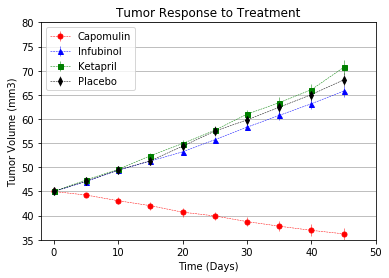

In [16]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(6,4))

plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label = "Capomulin")
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label = "Infubinol")
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"],yerr=error_pivot["Ketapril"],color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label = "Ketapril")
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"],yerr=error_pivot["Placebo"],color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label = "Placebo")

plt.xlim(-2,50)
plt.ylim(35,80)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(axis='y')

# legend 
plt.legend(loc='best', fontsize=10, frameon=True)


# Save the Figure
plt.savefig("TumorResponsetoTreatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metasite_mean = pymaceuticals_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
metasite_mean_df = pd.DataFrame(metasite_mean)

# Preview DataFrame
metasite_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasite_error = pymaceuticals_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
metasite_error_df = pd.DataFrame(metasite_error)

# Preview DataFrame
metasite_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
metasite_mean_reformat = metasite_mean_df.reset_index()
metasite_mean_pivot = metasite_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

metasite_error_reformat = metasite_error_df.reset_index()
metasite_error_pivot = metasite_error_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
metasite_mean_pivot.head()
metasite_error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


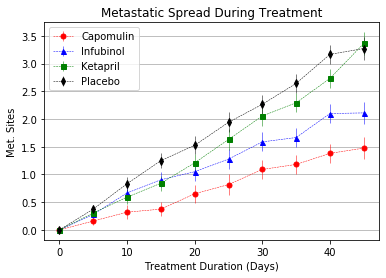

In [17]:
# Generate the Plot (with Error Bars)

plt.errorbar(metasite_mean_pivot.index, metasite_mean_pivot["Capomulin"], yerr=metasite_error_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label = "Capomulin")
plt.errorbar(metasite_mean_pivot.index, metasite_mean_pivot["Infubinol"], yerr=metasite_error_pivot["Capomulin"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label = "Infubinol")
plt.errorbar(metasite_mean_pivot.index, metasite_mean_pivot["Ketapril"], yerr=metasite_error_pivot["Capomulin"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label = "Ketapril")
plt.errorbar(metasite_mean_pivot.index, metasite_mean_pivot["Placebo"], yerr=metasite_error_pivot["Capomulin"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label = "Placebo")

plt.title('Metastatic Spread During Treatment') 
plt.xlabel('Treatment Duration (Days)') 
plt.ylabel('Met. Sites') 

plt.grid(axis='y')

plt.legend(loc='best', fontsize=10, frameon=True)

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = pymaceuticals_df.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})

# Preview DataFrame
mice_count_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat = mice_count_df.reset_index()
mice_pivot = mice_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
mice_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


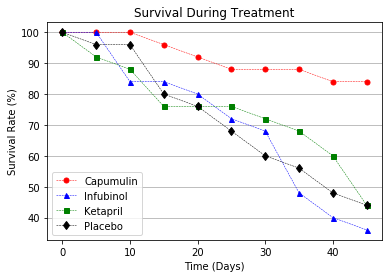

In [18]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50, label = "Capumulin")
plt.plot(100 * mice_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50, label = "Infubinol")
plt.plot(100 * mice_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50, label = "Ketapril")
plt.plot(100 * mice_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50, label = "Placebo")

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')

plt.legend(loc='best', fontsize=10, frameon=True)

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
drug_percent_change =  100 * (mean_pivot.iloc[-1] - mean_pivot.iloc[0]) / mean_pivot.iloc[0]
drug_percent_change_sem =  100 * (error_pivot.iloc[-1] - error_pivot.iloc[0]) / error_pivot.iloc[0]

# Display the data to confirm
drug_percent_change.head()

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

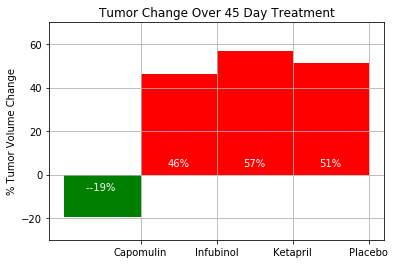

In [19]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (drug_percent_change["Capomulin"], 
                   drug_percent_change["Infubinol"],
                   drug_percent_change["Ketapril"],
                   drug_percent_change["Placebo"])

# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))  
width = 1

Drug_Pass = ax.bar(ind[0], percent_changes[0], width, color='green')
Drug_Fail = ax.bar(ind[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)


# Use functions to label the percentages of changes
def labelFail(drugs):
    for drug in drugs:
        height = drug.get_height()
        ax.text(drug.get_x() + drug.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def labelPass(drugs):
    for drug in drugs:
        height = drug.get_height()
        ax.text(drug.get_x() + drug.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
labelPass(Drug_Pass)
labelFail(Drug_Fail)

# Save the Figure
plt.savefig("TumorChange.png")

# Show the Figure
fig.show()